In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [93]:
df = pd.read_csv('CleanedData.csv',index_col=0)

In [94]:
df.head()

state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_intl_minutes  total_intl_calls  \
0             45.07  ...                10.0                 3   
1             27.47  ...                13.7                 3   
2             41.38  ...                12.2                 5   
3             50.90  ...                 6.6                 7   
4             28.34  ...                10.1                 3   

   total_intl_charge  customer_service_calls  churn  total_charge  \
0               2.70                       1  False         75.56   
1               3.70                       1  False         59.24   
2               3.29                       0  False         62.29   
3               1.78                       2  False         66.80   
4               2.73                       3  False         52.09   

   tenor_years  total_minutes  avg_price_per_min  total_calls  
0           10          717.2           0.105354          303  
1            8          625.2           0.094754          332  
2           11          539.4           0.115480          333  
3            7          564.8           0.118272          255  
4            6          512.0           0.101738          359  

[5 rows x 26 columns]

In [95]:
df['total_calls'].mean()

305.1371137113711

In [96]:
df['account_length'].median()

101.0

In [97]:
df['dailycharge'] = df['total_charge']/df['account_length']

In [98]:
df['dailycharge'].max()

69.95

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 27 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

In [100]:
df.describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  ...  total_intl_minutes  \
count       3333.000000          3333.000000  ...         3333.000000   
mean          17.083540           200.872037  ...           10.237294   
std            4.310668            50.573847  ...            2.791840   
min            0.000000            23.200000  ...            0.000000   
25%           14.160000           167.000000  ...            8.500000   
50%           17.120000           201.200000  ...           10.300000   
75%           20.000000           235.300000  ...           12.100000   
max           30.910000           395.000000  ...           20.000000   

       total_intl_calls  total_intl_charge  customer_service_calls  \
count       3333.000000        3333.000000             3333.000000   
mean           4.479448           2.764581                1.562856   
std            2.461214           0.753773                1.315491   
min            0.000000           0.000000                0.000000   
25%            3.000000           2.300000                1.000000   
50%            4.000000           2.780000                1.000000   
75%            6.000000           3.270000                2.000000   
max           20.000000           5.400000                9.000000   

       total_charge  tenor_years  total_minutes  avg_price_per_min  \
count   3333.000000  3333.000000    3333.000000        3333.000000   
mean      59.449754     7.966697     591.864776           0.100354   
std       10.502261     3.323734      89.954251           0.008440   
min       22.930000     0.000000     284.300000           0.066950   
25%       52.380000     6.000000     531.500000           0.094893   
50%       59.470000     8.000000     593.600000           0.100385   
75%       66.480000    10.000000     652.400000           0.106056   
max       96.150000    20.000000     885.000000           0.129791   

       total_calls  dailycharge  
count  3333.000000  3333.000000  
mean    305.137114     0.930584  
std      34.448164     2.927339  
min     191.000000     0.158488  
25%     282.000000     0.447424  
50%     305.000000     0.589368  
75%     328.000000     0.815570  
max     416.000000    69.950000  

[8 rows x 22 columns]

# Making Separate DataFrames for Churn and No Churn

In [101]:
dfchurn = df.loc[df['churn']==True]
dfnochurn = df.loc[df['churn']==False]

In [102]:
df['tenor_years'].describe()

count    3333.000000
mean        7.966697
std         3.323734
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: tenor_years, dtype: float64

In [103]:
df['tenor_years'].min(), df['tenor_years'].max()

(0, 20)

In [9]:
df['account_length'].max()

243

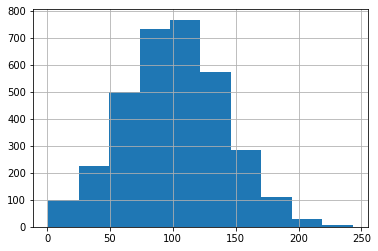

In [10]:
df['account_length'].hist()

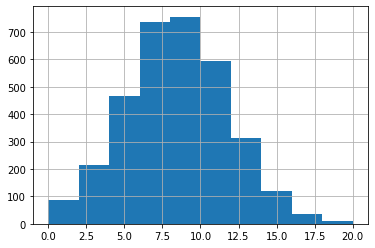

In [12]:
df['tenor_years'].hist()

In [13]:
df['account_length'].mean() + 3*df['account_length'].std()

220.53112426643486

In [14]:
df['account_length'].mean()

101.06480648064806

In [32]:
dfchurn.describe()

account_length   area_code  number_vmail_messages  total_day_minutes  \
count      483.000000  483.000000             483.000000         483.000000   
mean       102.664596  437.817805               5.115942         206.914079   
std         39.467820   42.792270              11.860138          68.997792   
min          1.000000  408.000000               0.000000           0.000000   
25%         76.000000  408.000000               0.000000         153.250000   
50%        103.000000  415.000000               0.000000         217.600000   
75%        127.000000  510.000000               0.000000         265.950000   
max        225.000000  510.000000              48.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count       483.000000        483.000000         483.000000       483.000000   
mean        101.335404         35.175921         212.410145       100.561077   
std          21.582307         11.729710          51.728910        19.724711   
min           0.000000          0.000000          70.900000        48.000000   
25%          87.500000         26.055000         177.100000        87.000000   
50%         103.000000         36.990000         211.300000       101.000000   
75%         116.500000         45.210000         249.450000       114.000000   
max         165.000000         59.640000         363.700000       168.000000   

       total_eve_charge  total_night_minutes  ...  total_night_charge  \
count        483.000000           483.000000  ...          483.000000   
mean          18.054969           205.231677  ...            9.235528   
std            4.396762            47.132825  ...            2.121081   
min            6.030000            47.400000  ...            2.130000   
25%           15.055000           171.250000  ...            7.705000   
50%           17.960000           204.800000  ...            9.220000   
75%           21.205000           239.850000  ...           10.795000   
max           30.910000           354.900000  ...           15.970000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count           483.00000        483.000000         483.000000   
mean             10.70000          4.163561           2.889545   
std               2.79319          2.551575           0.754152   
min               2.00000          1.000000           0.540000   
25%               8.80000          2.000000           2.380000   
50%              10.60000          4.000000           2.860000   
75%              12.80000          5.000000           3.460000   
max              20.00000         20.000000           5.400000   

       customer_service_calls  total_charge  tenor_years  total_minutes  \
count              483.000000    483.000000   483.000000     483.000000   
mean                 2.229814     65.355963     8.113872     635.255901   
std                  1.853275     13.885268     3.286694     110.730492   
min                  0.000000     22.930000     0.000000     319.900000   
25%                  1.000000     53.425000     6.000000     546.650000   
50%                  2.000000     66.910000     8.000000     646.100000   
75%                  4.000000     76.655000    10.000000     724.950000   
max                  9.000000     96.150000    18.000000     885.000000   

       avg_price_per_min  total_calls  
count         483.000000   483.000000  
mean            0.102349   306.459627  
std             0.008328    35.236367  
min             0.068756   207.000000  
25%             0.097202   283.000000  
50%             0.102976   306.000000  
75%             0.108062   331.000000  
max             0.124715   408.000000  

[8 rows x 21 columns]

In [33]:
dfnochurn.describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     2850.000000  2850.000000            2850.000000        2850.000000   
mean       100.793684   437.074737               8.604561         175.175754   
std         39.882350    42.306156              13.913125          50.181655   
min          1.000000   408.000000               0.000000           0.000000   
25%         73.000000   408.000000               0.000000         142.825000   
50%        100.000000   415.000000               0.000000         177.200000   
75%        127.000000   510.000000              22.000000         210.300000   
max        243.000000   510.000000              51.000000         315.600000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      2850.000000       2850.000000        2850.000000      2850.000000   
mean        100.283158         29.780421         199.043298       100.038596   
std          19.801157          8.530835          50.292175        19.958414   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.282500         164.500000        87.000000   
50%         100.000000         30.120000         199.600000       100.000000   
75%         114.000000         35.750000         233.200000       114.000000   
max         163.000000         53.650000         361.800000       170.000000   

       total_eve_charge  total_night_minutes  ...  total_night_charge  \
count       2850.000000          2850.000000  ...         2850.000000   
mean          16.918909           200.133193  ...            9.006074   
std            4.274863            51.105032  ...            2.299768   
min            0.000000            23.200000  ...            1.040000   
25%           13.980000           165.900000  ...            7.470000   
50%           16.970000           200.250000  ...            9.010000   
75%           19.820000           234.900000  ...           10.570000   
max           30.750000           395.000000  ...           17.770000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         2850.000000       2850.000000        2850.000000   
mean            10.158877          4.532982           2.743404   
std              2.784489          2.441984           0.751784   
min              0.000000          0.000000           0.000000   
25%              8.400000          3.000000           2.270000   
50%             10.200000          4.000000           2.750000   
75%             12.000000          6.000000           3.240000   
max             18.900000         19.000000           5.100000   

       customer_service_calls  total_charge  tenor_years  total_minutes  \
count             2850.000000   2850.000000  2850.000000    2850.000000   
mean                 1.449825     58.448807     7.941754     584.511123   
std                  1.163883      9.458436     3.329897      83.761067   
min                  0.000000     23.250000     0.000000     284.300000   
25%                  1.000000     52.220000     6.000000     528.925000   
50%                  1.000000     58.920000     8.000000     589.200000   
75%                  2.000000     65.137500    10.000000     641.575000   
max                  8.000000     87.290000    20.000000     842.300000   

       avg_price_per_min  total_calls  
count        2850.000000  2850.000000  
mean            0.100016   304.912982  
std             0.008414    34.314039  
min             0.066950   191.000000  
25%             0.094583   282.000000  
50%             0.099955   305.000000  
75%             0.105537   328.000000  
max             0.129791   416.000000  

[8 rows x 21 columns]

In [17]:
df.describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  ...  total_night_charge  \
count       3333.000000          3333.000000  ...         3333.000000   
mean          17.083540           200.872037  ...            9.039325   
std            4.310668            50.573847  ...            2.275873   
min            0.000000            23.200000  ...            1.040000   
25%           14.160000           167.000000  ...            7.520000   
50%           17.120000           201.200000  ...            9.050000   
75%           20.000000           235.300000  ...           10.590000   
max           30.910000           395.000000  ...           17.770000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       customer_service_calls  total_charge  tenor_years  total_minutes  \
count             3333.000000   3333.000000  3333.000000    3333.000000   
mean                 1.562856     59.449754     7.966697     591.864776   
std                  1.315491     10.502261     3.323734      89.954251   
min                  0.000000     22.930000     0.000000     284.300000   
25%                  1.000000     52.380000     6.000000     531.500000   
50%                  1.000000     59.470000     8.000000     593.600000   
75%                  2.000000     66.480000    10.000000     652.400000   
max                  9.000000     96.150000    20.000000     885.000000   

       avg_price_per_min  total_calls  
count        3333.000000  3333.000000  
mean            0.100354   305.137114  
std             0.008440    34.448164  
min             0.066950   191.000000  
25%             0.094893   282.000000  
50%             0.100385   305.000000  
75%             0.106056   328.000000  
max             0.129791   416.000000  

[8 rows x 21 columns]

# Looking at Churn Rate by State

In [7]:
dfstate = df.groupby(['state'])['churn'].agg(['sum','count'])

In [8]:
dfstate.reset_index(inplace=True)

In [9]:
dfstate['nochurn'] = dfstate['count']-dfstate['sum']

In [10]:
dfstate.rename({'sum':'churn'},inplace=True,axis=1)

In [11]:
#dfstate['churn_rate'] = dfstate['churn']/dfstate['count']*100

In [12]:
top15states = dfstate.sort_values(by='count',ascending=False)[:20]

In [13]:
top15states

state  churn  count  nochurn
49    WV   10.0    106     96.0
23    MN   15.0     84     69.0
34    NY   15.0     83     68.0
1     AL    8.0     80     72.0
37    OR   11.0     78     67.0
48    WI    7.0     78     71.0
35    OH   10.0     78     68.0
45    VA    5.0     77     72.0
50    WY    9.0     77     68.0
6     CT   12.0     74     62.0
46    VT    8.0     73     65.0
13    ID    9.0     73     64.0
22    MI   16.0     73     57.0
44    UT   10.0     72     62.0
43    TX   18.0     72     54.0
15    IN    9.0     71     62.0
16    KS   13.0     70     57.0
20    MD   17.0     70     53.0
31    NJ   18.0     68     50.0
27    NC   11.0     68     57.0

In [14]:
top15states.drop('count',axis=1,inplace=True)

In [15]:
top15states

state  churn  nochurn
49    WV   10.0     96.0
23    MN   15.0     69.0
34    NY   15.0     68.0
1     AL    8.0     72.0
37    OR   11.0     67.0
48    WI    7.0     71.0
35    OH   10.0     68.0
45    VA    5.0     72.0
50    WY    9.0     68.0
6     CT   12.0     62.0
46    VT    8.0     65.0
13    ID    9.0     64.0
22    MI   16.0     57.0
44    UT   10.0     62.0
43    TX   18.0     54.0
15    IN    9.0     62.0
16    KS   13.0     57.0
20    MD   17.0     53.0
31    NJ   18.0     50.0
27    NC   11.0     57.0

In [16]:
top15states.set_index('state',drop=True,inplace=True)

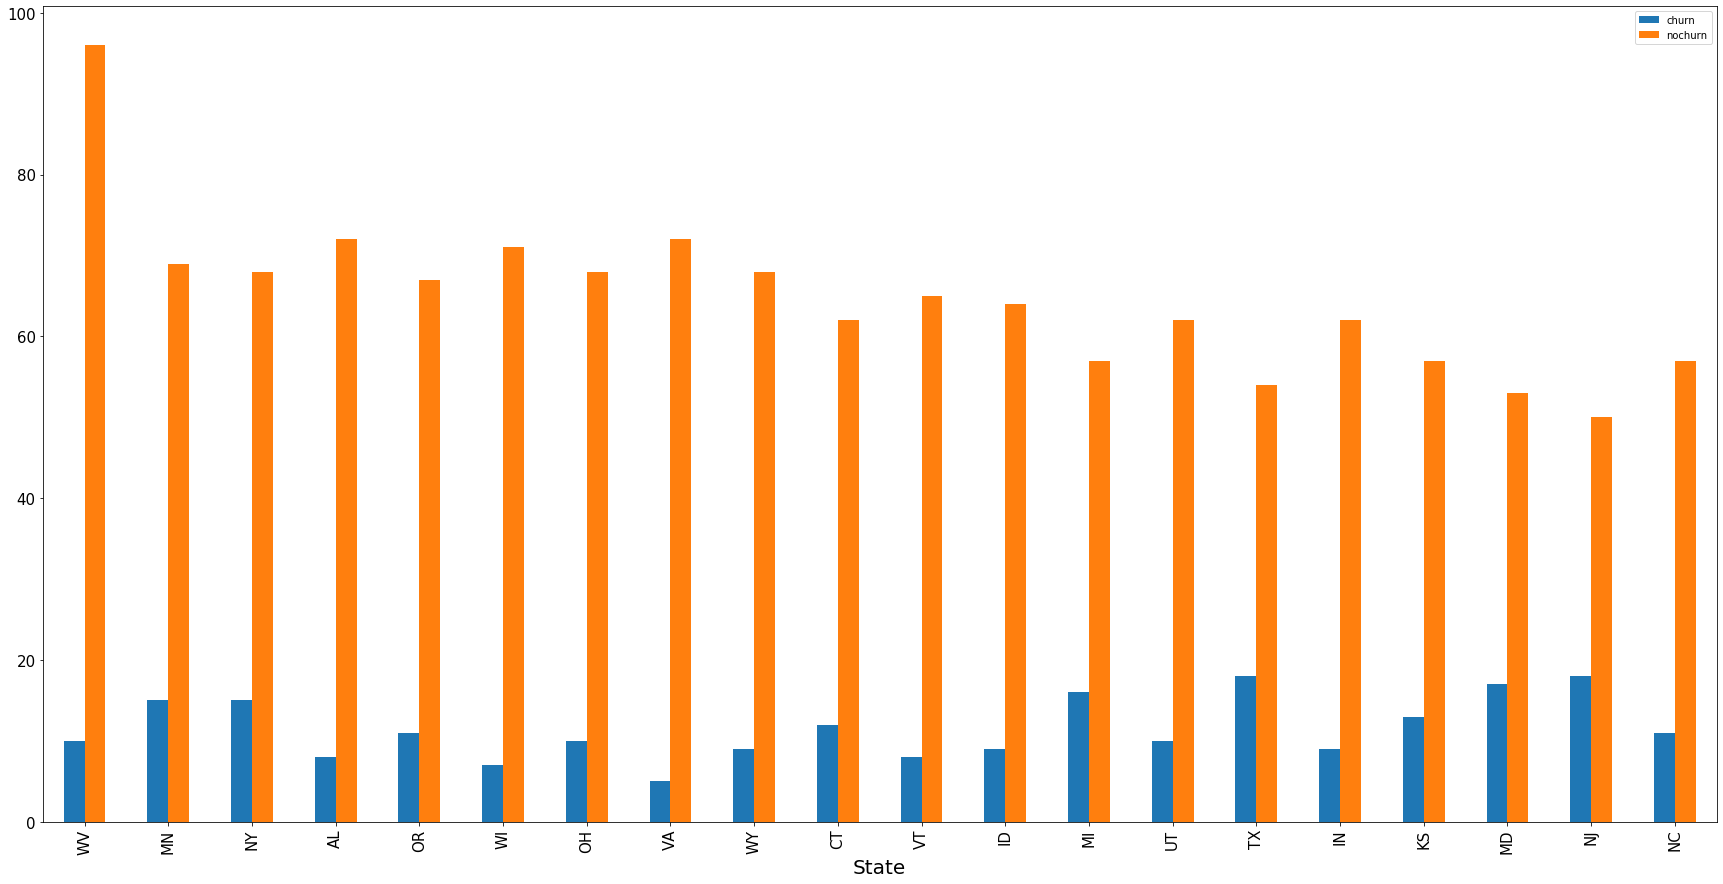

In [17]:
top15states.plot(kind='bar',stacked=False,figsize=(30,15))
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("State", size=20)
plt.show();

In [18]:
dfstatechurn = df.groupby(['state'])['churn'].agg(['count','sum'])

In [19]:
dfstatechurn['churnrate'] = dfstatechurn['sum']/dfstatechurn['count']*100

In [20]:
dfstatechurn.reset_index(inplace=True)

In [21]:
dfstatechurn.head()

state  count   sum  churnrate
0    AK     52   3.0   5.769231
1    AL     80   8.0  10.000000
2    AR     55  11.0  20.000000
3    AZ     64   4.0   6.250000
4    CA     34   9.0  26.470588

In [25]:
dfstatechurn.sort_values(by='churnrate',ascending=False)[:5]

state  count   sum  churnrate
31    NJ     68  18.0  26.470588
4     CA     34   9.0  26.470588
43    TX     72  18.0  25.000000
20    MD     70  17.0  24.285714
40    SC     60  14.0  23.333333

In [27]:
dfstatechurn.sort_values(by='churnrate',ascending=True)[:5]

state  count  sum  churnrate
11    HI     53  3.0   5.660377
0     AK     52  3.0   5.769231
3     AZ     64  4.0   6.250000
45    VA     77  5.0   6.493506
12    IA     44  3.0   6.818182

In [26]:
dfstatechurn['churnrate'].agg(['mean','median'])

mean      14.492688
median    13.636364
Name: churnrate, dtype: float64

In [22]:
fig = px.choropleth(dfstatechurn,locations='state',locationmode='USA-states',
                    color ='churnrate',scope="usa",color_continuous_scale='Reds',)
fig.show()

# Customers per State

In [697]:
fig = px.choropleth(dfstatechurn,locations='state',locationmode='USA-states',color ='count',scope="usa",color_continuous_scale='Reds',)
fig.show()

# Average Price by State

In [794]:
dfstatecharge = df.groupby(['state'])['total_charge'].agg(['mean','median'])

In [795]:
dfstatecharge.reset_index(inplace=True)

In [796]:
fig = px.choropleth(dfstatecharge,locations='state',locationmode='USA-states',color ='median',scope="usa",color_continuous_scale='Reds')
fig.show()

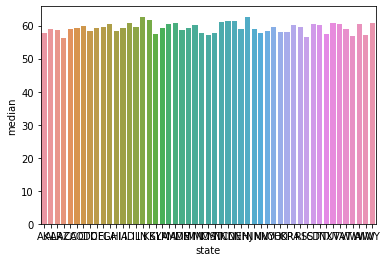

In [797]:
sns.barplot(x='state',y='median',data=dfstatecharge)

In [808]:
top15 = dfstatecharge.sort_values(by='mean',ascending=False)[:15]

In [809]:
top15

state       mean  median
15    IN  62.787746  62.570
31    NJ  62.420000  62.700
20    MD  62.075714  60.670
16    KS  61.886286  61.705
41    SD  61.255500  60.355
28    ND  61.109032  61.355
19    MA  60.710615  60.610
35    OH  60.688333  59.645
46    VT  60.459041  59.100
23    MN  60.371310  60.220
10    GA  60.301111  60.460
27    NC  60.252500  61.000
21    ME  60.186774  58.775
42    TN  60.021698  60.240
38    PA  59.962000  60.050

In [798]:
df.groupby('area_code')['total_charge'].median()

area_code
408    58.595
415    59.880
510    59.475
Name: total_charge, dtype: float64

In [800]:
df['phone_number']

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object

# Customer Services Calls per state

In [354]:
dfstatecust = df.groupby(['state'])['customer_service_calls'].agg(['count','sum'])
dfstatecust.head()

count  sum
state            
AK        52   81
AL        80  125
AR        55  109
AZ        64  102
CA        34   50

In [355]:
dfstatecust['callspercust'] = dfstatecust['sum']/dfstatecust['count']

In [356]:
dfstatecust.reset_index(inplace=True)

In [357]:
fig = px.choropleth(dfstatecust,locations='state',locationmode='USA-states',color ='callspercust',scope="usa",color_continuous_scale='Reds')
fig.show()

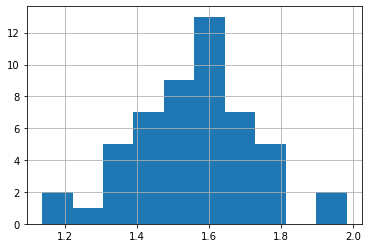

In [358]:
dfstatecust['callspercust'].hist()

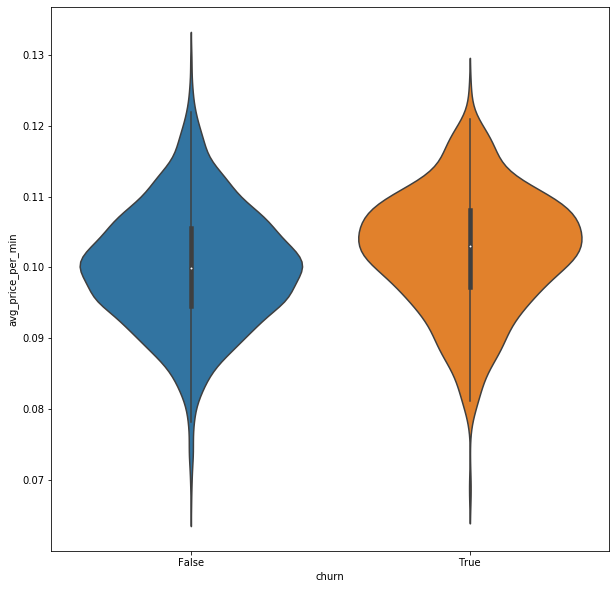

In [359]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df,x='churn',y='avg_price_per_min')

# Churn/ no churn based on Monthly Charge

Text(0, 0.5, 'Monthly Charge')

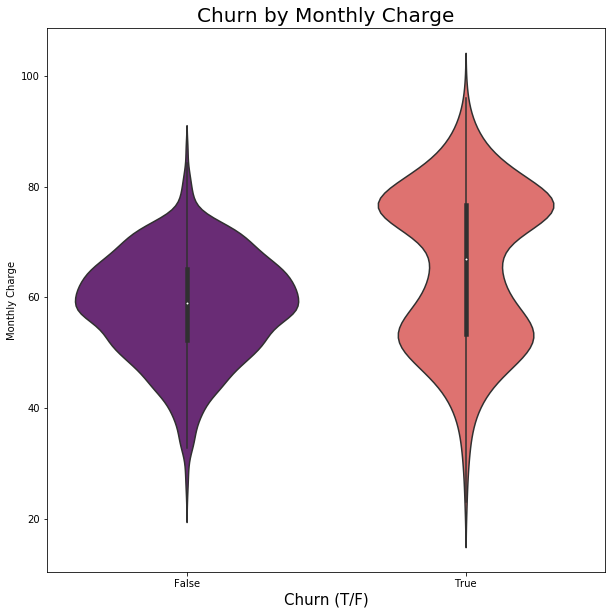

In [819]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df,x='churn',y='total_charge',palette='magma')
plt.title('Churn by Monthly Charge',size = 20)
plt.xlabel('Churn (T/F)',size=15)
plt.ylabel('Monthly Charge')

Text(3.799999999999997, 0.5, 'Monthly Charge')

<Figure size 720x720 with 0 Axes>

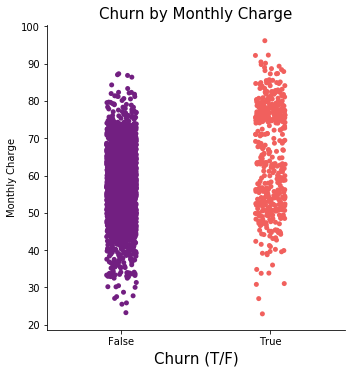

In [824]:
plt.figure(figsize=(10,10))
sns.catplot(data=df,x='churn',y='total_charge',palette='magma')
plt.title('Churn by Monthly Charge',size = 15)
plt.xlabel('Churn (T/F)',size=15)
plt.ylabel('Monthly Charge')

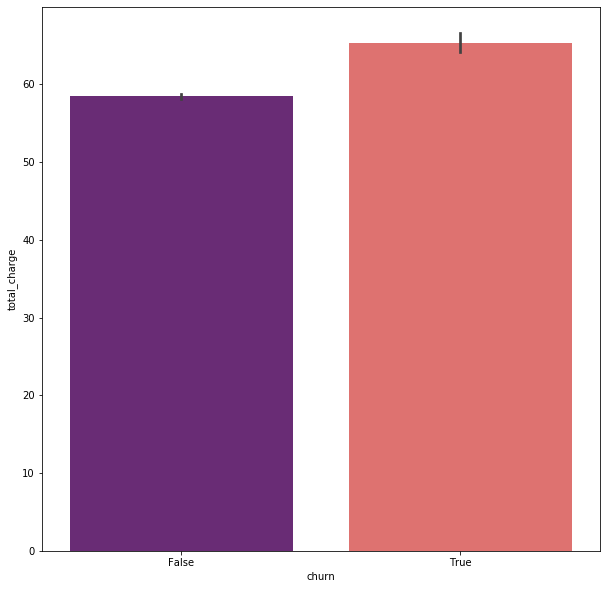

In [825]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,y = 'total_charge',x ='churn',palette='magma')

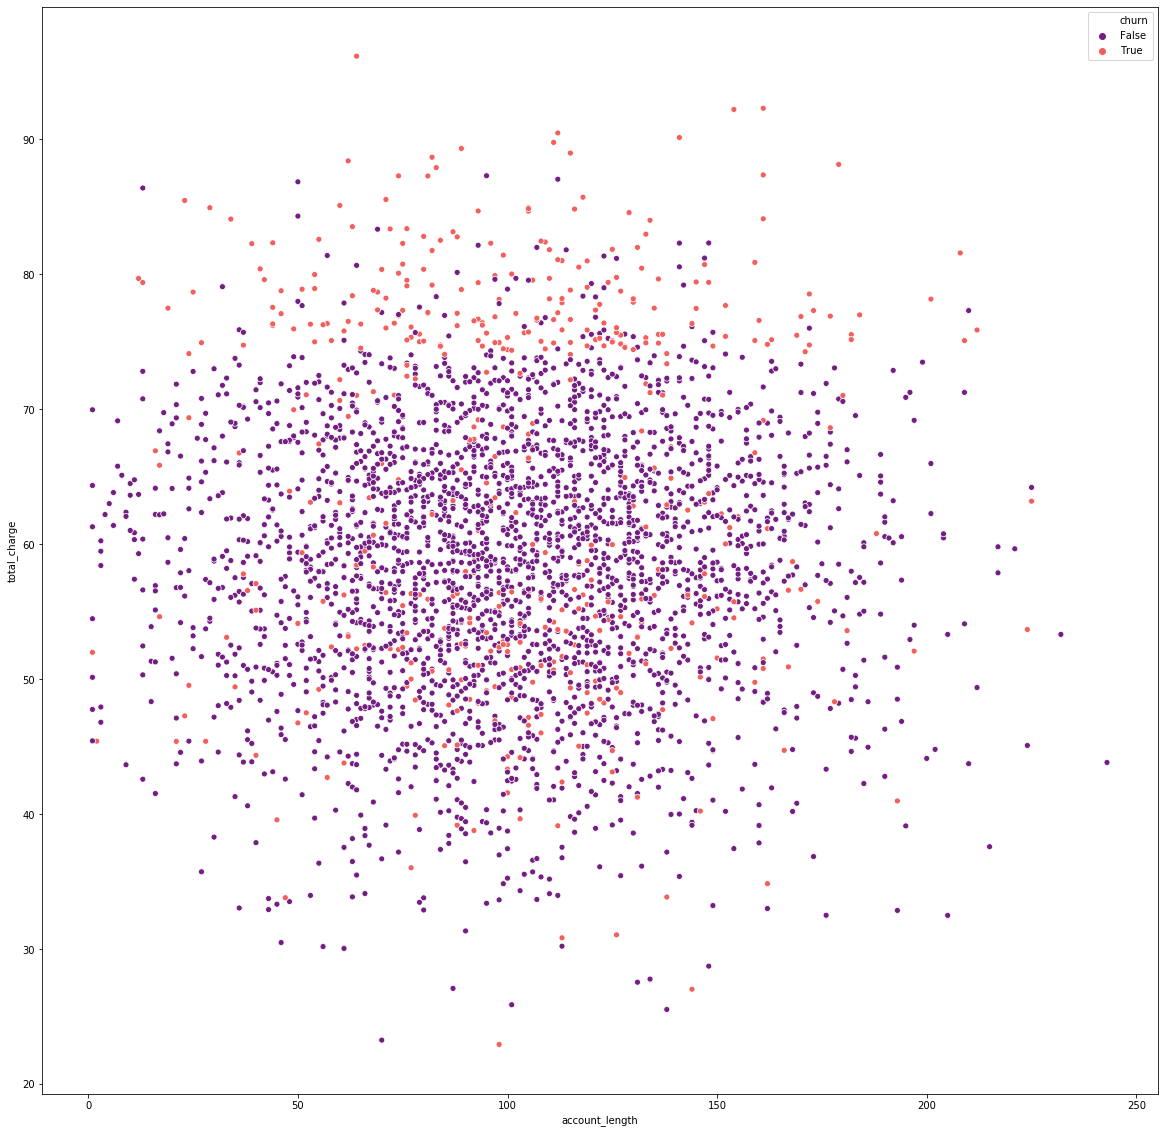

In [826]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df,x='account_length',y='total_charge',hue='churn',palette='magma')

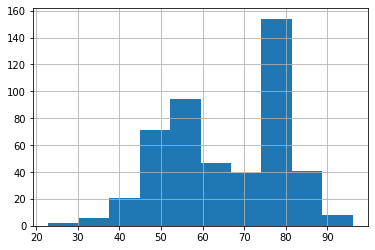

In [600]:
dfchurn['total_charge'].hist()

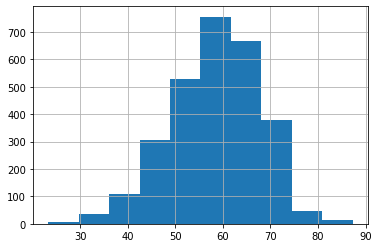

In [601]:
dfnochurn['total_charge'].hist()

In [602]:
dfchurn['total_charge'].median(),dfnochurn['total_charge'].median()

(66.91000000000001, 58.92)

In [603]:
dfchurn['total_charge'].mean(),dfnochurn['total_charge'].mean()

(65.35596273291925, 58.448807017543864)

**There is a 8 USD differnt in the average monthly charge of people who leave and stay**

In [654]:
dfchurn.loc[dfchurn['total_charge']>70].shape[0]/dfchurn.shape[0]

0.4658385093167702

In [653]:
dfnochurn.loc[dfnochurn['total_charge']>70].shape[0]/dfnochurn.shape[0]

0.1056140350877193

46% of people who leave have a total charge of over 70 per month compared with only 10% of people who don't.
This would imply that over priced plans are what are causing people to churn

In [657]:
dfchurn.loc[dfchurn['total_charge']>75].shape[0]/dfchurn.shape[0],dfnochurn.loc[dfnochurn['total_charge']>75].shape[0]/dfnochurn.shape[0]

(0.36024844720496896, 0.021052631578947368)

In [658]:
dfchurn.loc[dfchurn['total_charge']>80].shape[0]/dfchurn.shape[0],dfnochurn.loc[dfnochurn['total_charge']>80].shape[0]/dfnochurn.shape[0]

(0.13043478260869565, 0.00631578947368421)

36% of people who leave have a total charge of over 75 per month compared with only 2% of people who don't.

13% of people who leave have a charge of over 13% per month compared with only 0.1% of people who stay

# Exploring Daytime Charge/Calls

In [667]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_charge', 'tenor_years',
       'total_minutes', 'avg_price_per_min', 'avg_ppm_day'],
      dtype='object')

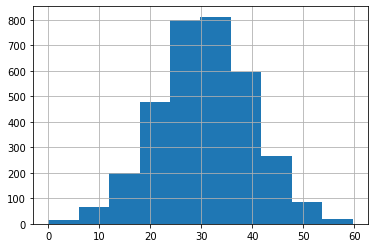

In [668]:
df['total_day_charge'].hist()

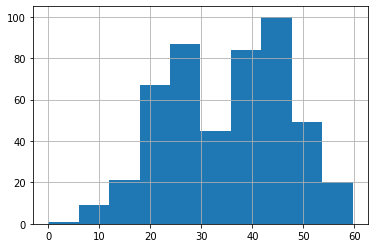

In [669]:
dfchurn['total_day_charge'].hist()

In [670]:
dfchurn['total_day_charge'].median(),dfnochurn['total_day_charge'].median()

(36.99, 30.12)

on average, day charge is approx 7USD more for peopel who leave


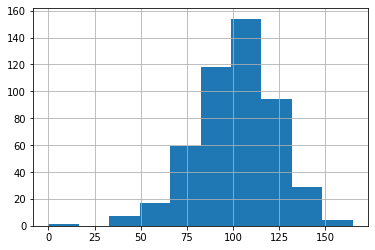

In [672]:
dfchurn['total_day_calls'].hist()

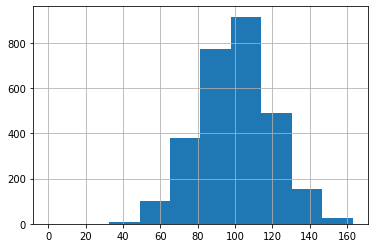

In [673]:
dfnochurn['total_day_calls'].hist()

Text(0, 0.5, 'Monthly Charge')

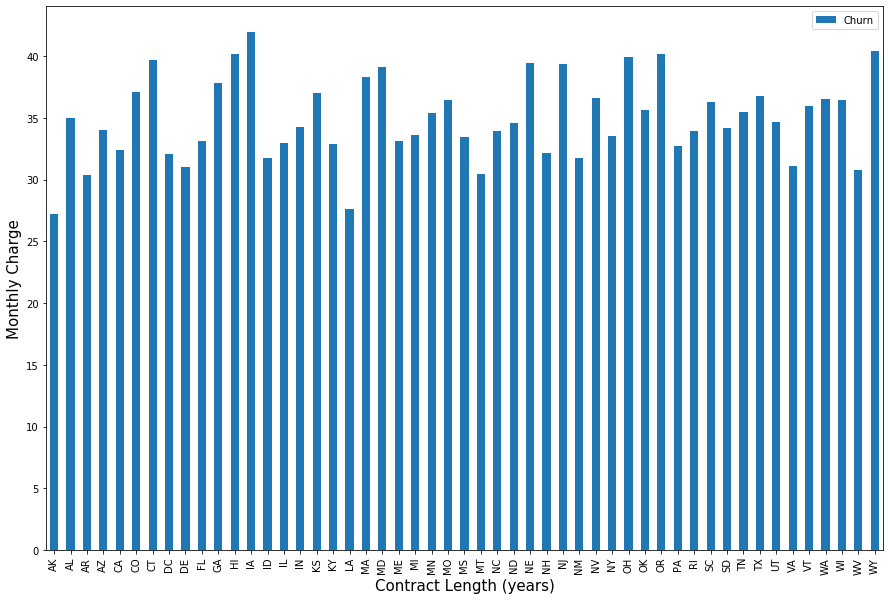

In [678]:
plt.figure(figsize=(15,10))
dfchurn.groupby('state')['total_day_charge'].mean().plot(kind='bar')
#plt.title('Average Monthly Charge',size=20)
plt.legend(('Churn','No Churn'))
plt.xlabel('Contract Length (years)',size=15)
plt.ylabel('Monthly Charge',size=15)

# Exploring International Plan Breakdown
#### This is very interesting - Nearly 50% of people with an international plan left 

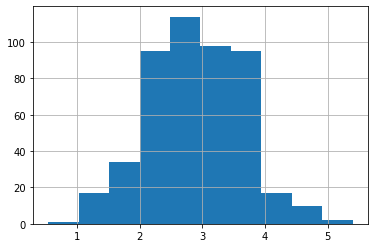

In [109]:
dfchurn['total_intl_charge'].hist()

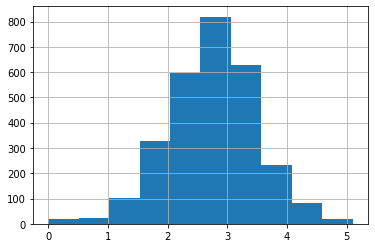

In [110]:
dfnochurn['total_intl_charge'].hist()

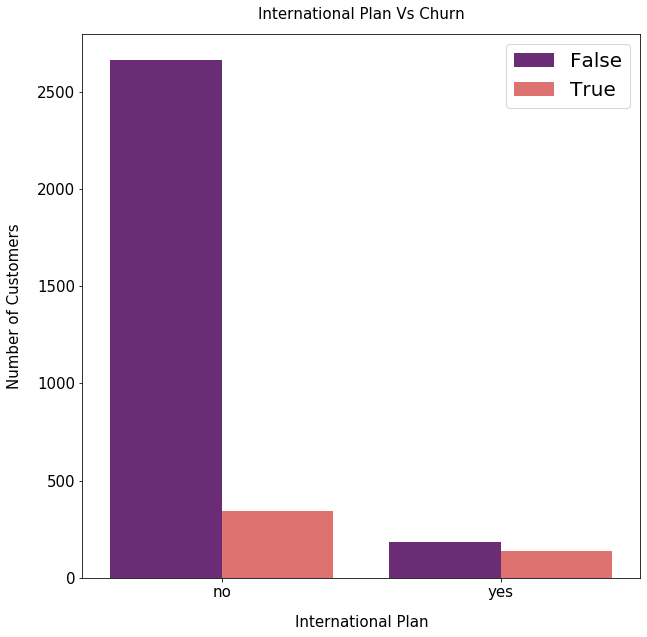

In [87]:
plt.figure(figsize=(10,10))
sns.countplot('international_plan',hue='churn',data=df,palette='magma')
plt.xlabel('International Plan',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("International Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


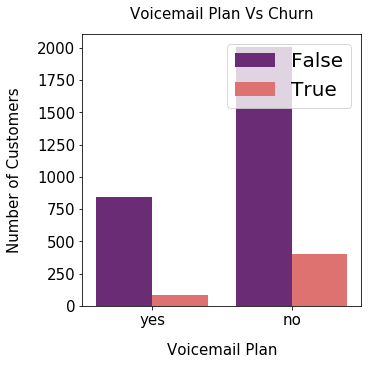

In [105]:
plt.figure(figsize=(5,5))
sns.countplot('voice_mail_plan',hue='churn',data=df,palette='magma')
plt.xlabel('Voicemail Plan',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Voicemail Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


In [104]:
df['int+voice'] = np.where((df['international_plan']=='yes')&(df['voice_mail_plan']=='yes'),1,0)
df['noint+voice'] = np.where((df['international_plan']=='no')&(df['voice_mail_plan']=='yes'),1,0)
df['int+novoice'] = np.where((df['international_plan']=='yes')&(df['voice_mail_plan']=='no'),1,0)
df['noint+novoice'] = np.where((df['international_plan']=='no')&(df['voice_mail_plan']=='no'),1,0)

In [107]:
df['int+novoice'].sum()

231

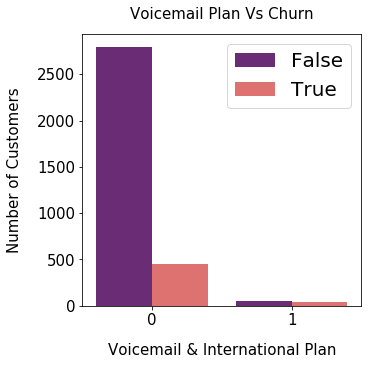

In [109]:
plt.figure(figsize=(5,5))
sns.countplot('int+voice',hue='churn',data=df,palette='magma')
plt.xlabel('Voicemail & International Plan',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Voicemail Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


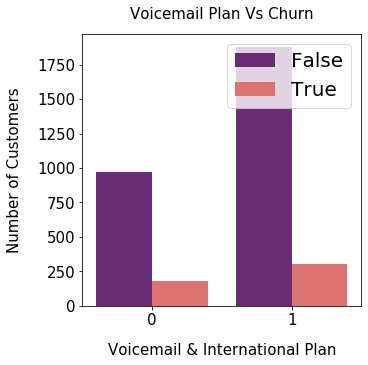

In [110]:
plt.figure(figsize=(5,5))
sns.countplot('noint+novoice',hue='churn',data=df,palette='magma')
plt.xlabel('Voicemail & International Plan',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Voicemail Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


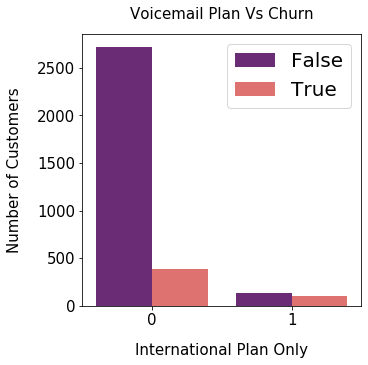

In [113]:
plt.figure(figsize=(5,5))
sns.countplot('int+novoice',hue='churn',data=df,palette='magma')
plt.xlabel('International Plan Only',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Voicemail Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


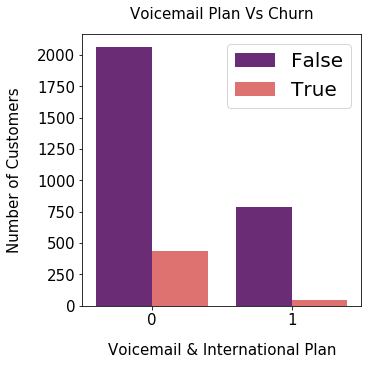

In [112]:
plt.figure(figsize=(5,5))
sns.countplot('noint+voice',hue='churn',data=df,palette='magma')
plt.xlabel('Voicemail & International Plan',size=15,labelpad=15)
plt.ylabel("Number of Customers",size=15,labelpad=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Voicemail Plan Vs Churn",size=15,pad=15)
plt.legend(loc=1, prop={'size': 20})


No handles with labels found to put in legend.


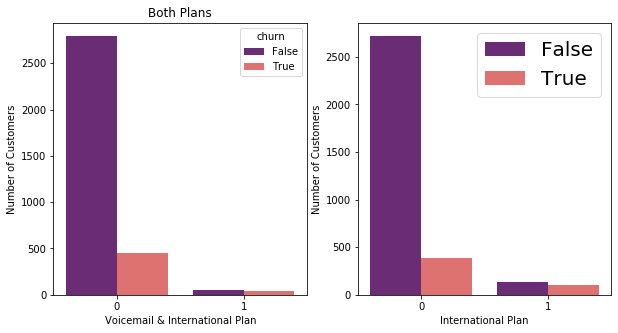

In [144]:
# Define a new figure with matplotlib's .plot() function. Set the size of figure space
new_figure = plt.figure(figsize=(10,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(121)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(122)


sns.countplot('int+voice',hue='churn',data=df,palette='magma',ax=ax1)
ax1.set_xlabel('Voicemail & International Plan')
ax1.set_ylabel("Number of Customers")
ax1.set_title("Both Plans")
plt.legend(loc=1, prop={'size': 20})

sns.countplot('int+novoice',hue='churn',data=df,palette='magma',ax=ax2)
ax2.set_xlabel('International Plan')
ax2.set_ylabel("Number of Customers")
ax2.set_title("")
plt.legend(loc=1, prop={'size': 20})





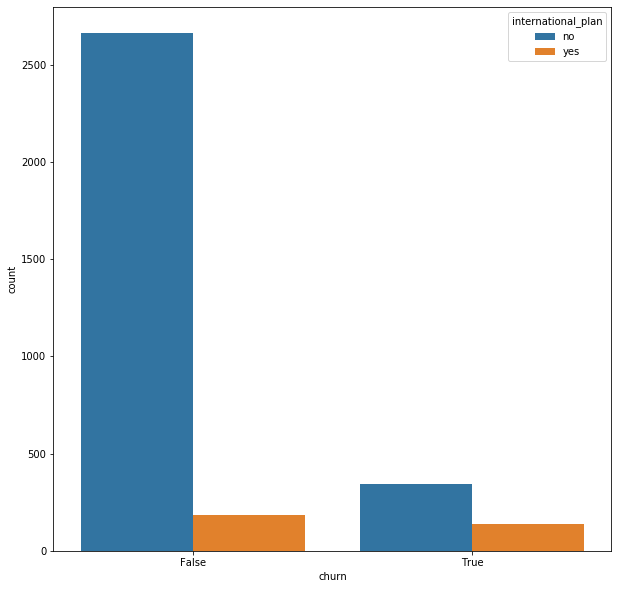

In [866]:
plt.figure(figsize=(10,10))
sns.countplot('churn',hue='international_plan',data=df)

In [396]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [397]:
dfchurn['international_plan'].value_counts()

no     346
yes    137
Name: international_plan, dtype: int64

In [398]:
dfnochurn['international_plan'].value_counts()

no     2664
yes     186
Name: international_plan, dtype: int64

In [399]:
intchurn = dfchurn.loc[dfchurn['international_plan']=='yes'].shape[0]
intnochurn = dfnochurn.loc[dfnochurn['international_plan']=='yes'].shape[0]

In [400]:
f" {dfchurn[dfchurn['international_plan']=='yes'].shape[0]/dfchurn.shape[0]*100}% of people who left had an international plan"

' 28.36438923395445% of people who left had an international plan'

In [401]:
f" {round(intchurn/(intchurn+intnochurn),2)*100}% of people with an international plan left"

' 42.0% of people with an international plan left'

In [406]:
df.loc[df['international_plan']=='yes']['total_charge'].mean(),df.loc[df['international_plan']=='no']['total_charge'].mean()

(61.001702786377706, 59.283215946843846)

**There is not a massive difference between average total charge of international plans and not international plans - So why is the churn rate so high?**

In [407]:
dfinternational = df.loc[df['international_plan']=='yes']

In [408]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_charge', 'tenor_years',
       'total_minutes', 'avg_price_per_min'],
      dtype='object')

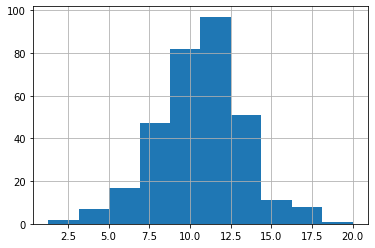

In [412]:
dfinternational['total_intl_minutes'].hist()

In [415]:
dfinternational['total_intl_calls'].median()

4.0

In [416]:
dfinternational['total_intl_minutes'].median()

10.8

In [690]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_charge', 'tenor_years',
       'total_minutes', 'avg_price_per_min', 'avg_ppm_day'],
      dtype='object')

In [691]:
dfinternational.loc[dfinternational['churn']==True]['total_intl_charge'].median()

3.16

In [694]:
dfinternational.loc[dfinternational['churn']==True]['total_intl_calls'].median()

3.0

In [693]:
dfinternational.loc[dfinternational['churn']==False]['total_intl_charge'].median()

2.73

In [695]:
dfinternational.loc[dfinternational['churn']==False]['total_intl_calls'].median()

4.0

**It would seem that the churn rate on the international plan is just a coincidence, maybe down to the fact that the international plan is not used majorly**

# Voicemail Plan

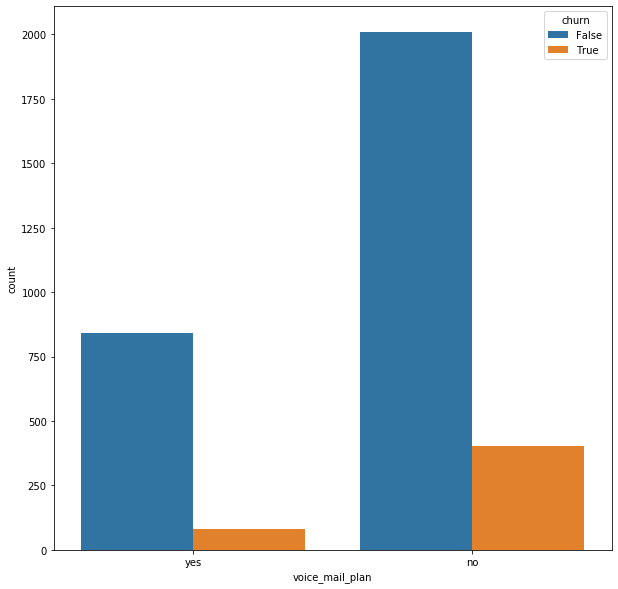

In [59]:
plt.figure(figsize=(10,10))
sns.countplot('voice_mail_plan',hue='churn',data=df)

In [60]:
voicemail_plan = df.loc[df['voice_mail_plan']=='yes']

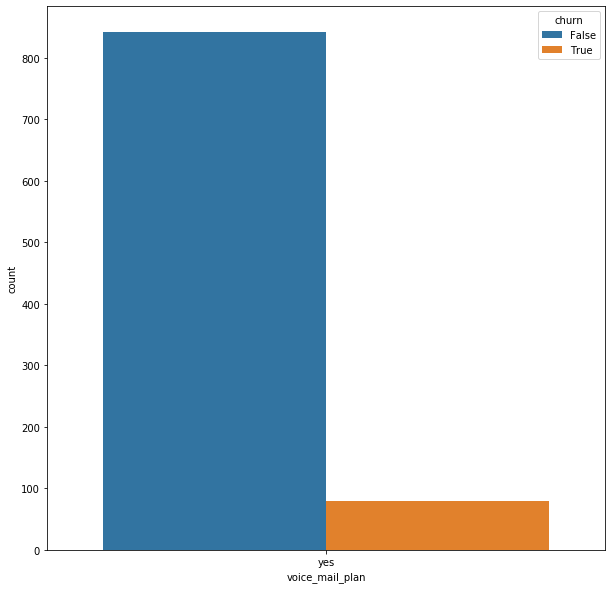

In [61]:
plt.figure(figsize=(10,10))
sns.countplot('voice_mail_plan',hue='churn',data=voicemail_plan)

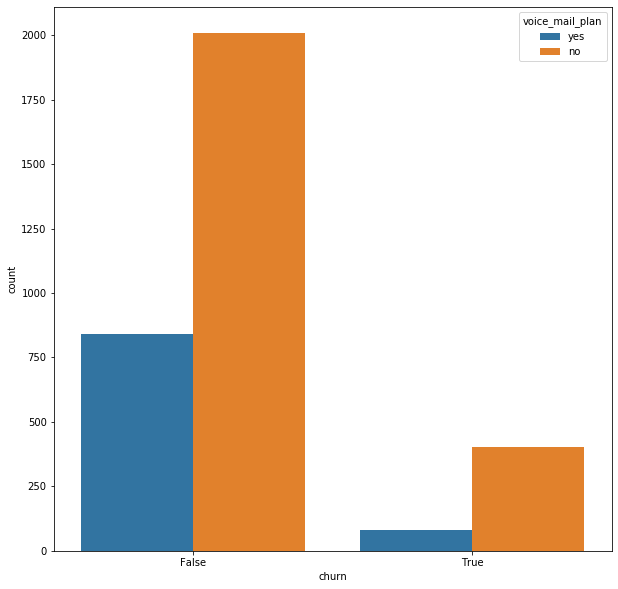

In [62]:
plt.figure(figsize=(10,10))
sns.countplot('churn',hue='voice_mail_plan',data=df)

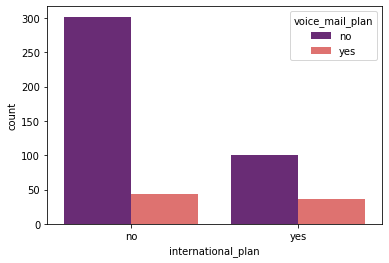

In [63]:
sns.countplot('international_plan',hue='voice_mail_plan',data=dfchurn,palette='magma')


In [64]:
voicemail_plan.loc[voicemail_plan['churn']==True]

state  account_length  area_code phone_number international_plan  \
41      MD             135        408     383-6029                yes   
57      CO             121        408     370-7574                 no   
115     ME              36        510     363-1069                yes   
127     MS              61        510     414-8718                 no   
198     ME             131        510     353-7292                yes   
...    ...             ...        ...          ...                ...   
3023    MT             103        510     342-1004                 no   
3209    OH              68        415     369-8574                yes   
3246    NC              77        408     334-6129                yes   
3287    KS             170        415     404-5840                 no   
3291    MI             119        510     335-7324                yes   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
41               yes                     41              173.1   
57               yes                     30              198.4   
115              yes                     42              196.8   
127              yes                     27              187.5   
198              yes                     26              292.9   
...              ...                    ...                ...   
3023             yes                     35              110.5   
3209             yes                     24              125.7   
3246             yes                     44              103.2   
3287             yes                     42              199.5   
3291             yes                     22              172.1   

      total_day_calls  total_day_charge  ...  total_intl_charge  \
41                 85             29.43  ...               3.94   
57                129             33.73  ...               1.57   
115                89             33.46  ...               5.40   
127               124             31.88  ...               1.73   
198               101             49.79  ...               3.73   
...               ...               ...  ...                ...   
3023              101             18.79  ...               3.75   
3209               92             21.37  ...               3.83   
3246              117             17.54  ...               3.21   
3287              119             33.92  ...               2.94   
3291              119             29.26  ...               3.75   

      customer_service_calls  churn  total_charge  tenor_years  total_minutes  \
41                         0   True         56.20           11          513.8   
57                         3   True         49.85           10          460.7   
115                        0   True         66.75            3          610.0   
127                        4   True         56.23            5          566.2   
198                        4   True         81.98           10          761.7   
...                      ...    ...           ...          ...            ...   
3023                       4   True         44.18            8          420.1   
3209                       3   True         58.30            5          630.3   
3246                       0   True         50.00            6          554.9   
3287                       4   True         56.65           14          530.0   
3291                       1   True         58.77            9          559.6   

      avg_price_per_min  total_calls  calls>3  annual_charge  
41             0.109381          285        0         674.40  
57             0.108205          286        0         598.20  
115            0.109426          343        0         801.00  
127            0.099311          362        1         674.76  
198            0.107628          332        1         983.76  
...                 ...          ...      ...            ...  
3023           0.105165          261        1         530.16  
3209           0.092496          304        0        

In [65]:
dfchurn['account_length'].describe()

count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: account_length, dtype: float64

In [66]:
dfnochurn['account_length'].describe()

count    2850.000000
mean      100.793684
std        39.882350
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [67]:
dfchurn['account_length'].median(),dfnochurn['account_length'].median()

(103.0, 100.0)

In [144]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_charge', 'tenor_years',
       'total_minutes'],
      dtype='object')

In [68]:
dfchurn['voice_mail_plan'].value_counts()

no     403
yes     80
Name: voice_mail_plan, dtype: int64

48

# Tenor in years vs Churn

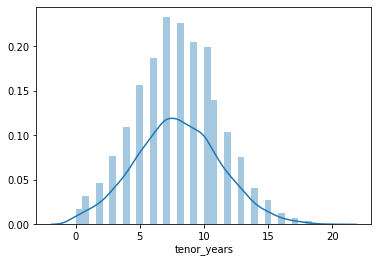

In [751]:
sns.distplot(df['tenor_years'])

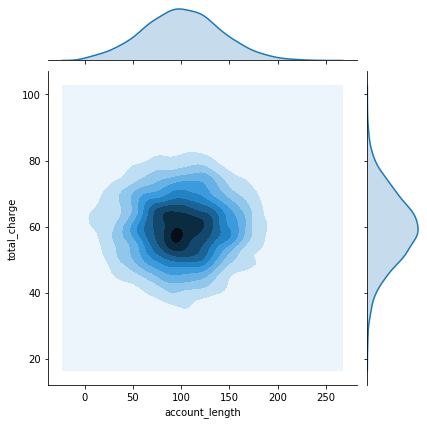

In [758]:
sns.jointplot(data=df,x='account_length',y='total_charge',kind='kde')

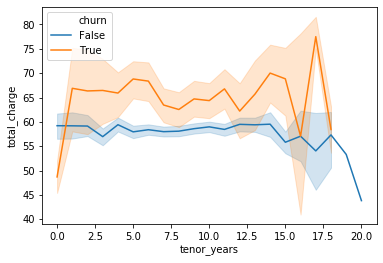

In [753]:
sns.lineplot(data=df,x='tenor_years',y='total_charge',hue='churn',estimator='mean')

FRom this it would seem that people who stay came in on an average monthly charge of 60 per month, and this has stayed constant throughout

Those who left, came in at cheaper rates, 50 per month, presumably from promotional deals, and then saw their monthly charge significantly increased to above 65 per month.

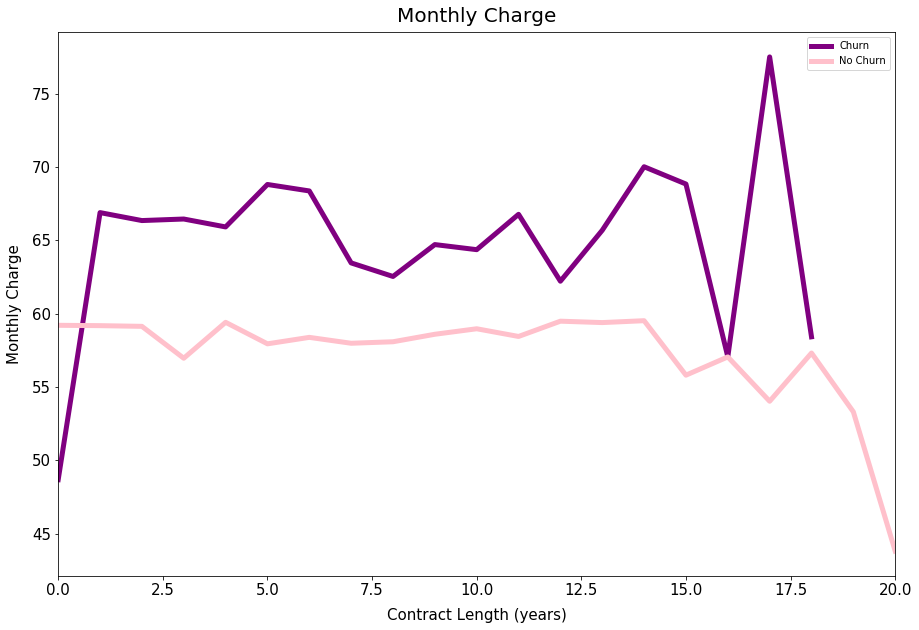

In [57]:
palette = plt.get_cmap('magma')
plt.figure(figsize=(15,10))
dfchurn.groupby('tenor_years')['total_charge'].mean().plot.line(linewidth=5,color='purple')
dfnochurn.groupby('tenor_years')['total_charge'].mean().plot.line(linewidth=5,color='pink')
plt.title('Monthly Charge',size=20,pad=10)
plt.legend(('Churn','No Churn'))
plt.xlabel('Contract Length (years)',size=15,labelpad=10)
plt.ylabel('Monthly Charge',size=15,labelpad=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

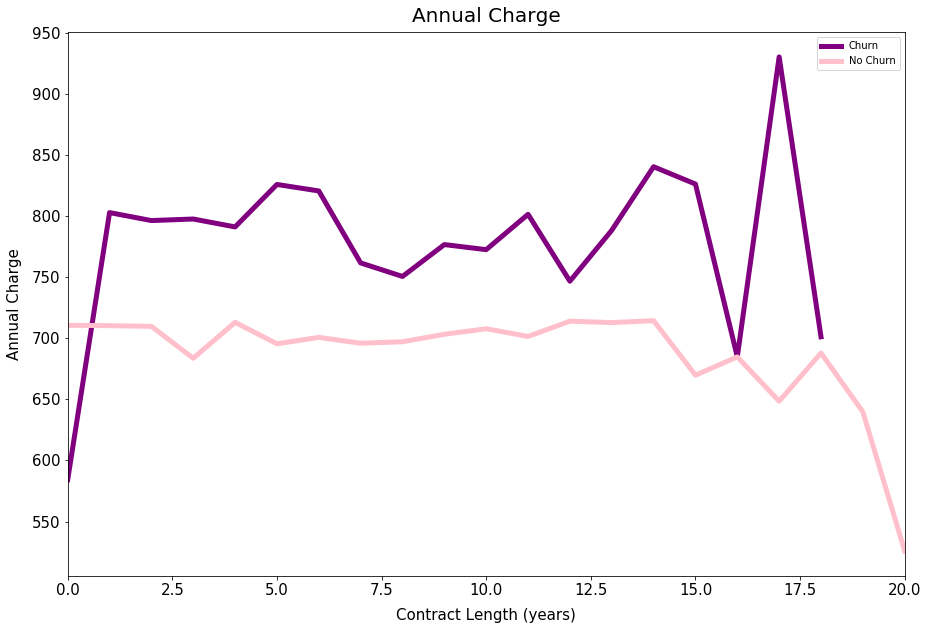

In [58]:
palette = plt.get_cmap('magma')
plt.figure(figsize=(15,10))
dfchurn.groupby('tenor_years')['annual_charge'].mean().plot.line(linewidth=5,color='purple')
dfnochurn.groupby('tenor_years')['annual_charge'].mean().plot.line(linewidth=5,color='pink')
plt.title('Annual Charge',size=20,pad=10)
plt.legend(('Churn','No Churn'))
plt.xlabel('Contract Length (years)',size=15,labelpad=10)
plt.ylabel('Annual Charge',size=15,labelpad=10)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [54]:
dfchurn['annual_charge'] = df['total_charge']*12
dfnochurn['annual_charge'] = df['total_charge']*12

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Monthly Charge')

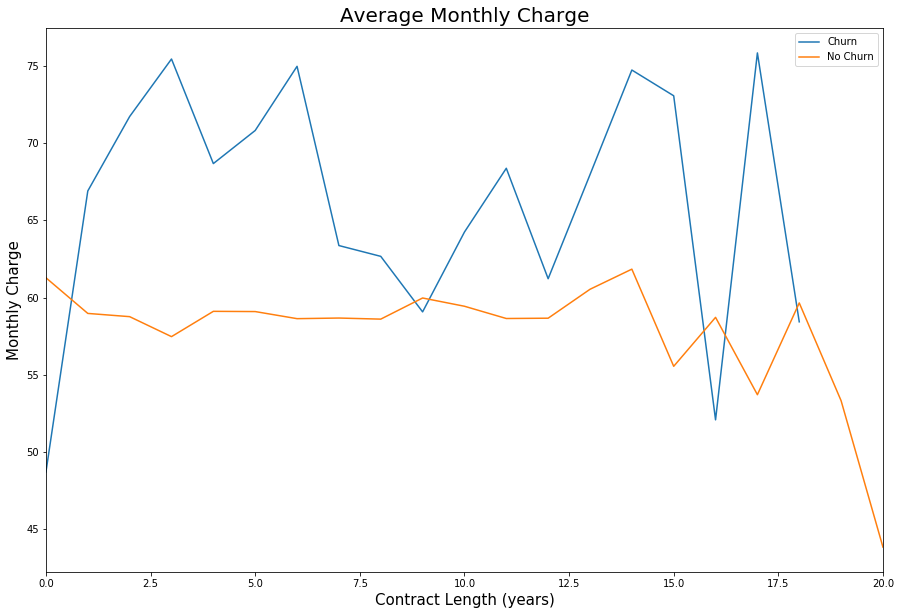

In [393]:
plt.figure(figsize=(15,10))
dfchurn.groupby('tenor_years')['total_charge'].median().plot(kind='line')
dfnochurn.groupby('tenor_years')['total_charge'].median().plot(kind='line')
plt.title('Average Monthly Charge',size=20)
plt.legend(('Churn','No Churn'))
plt.xlabel('Contract Length (years)',size=15)
plt.ylabel('Monthly Charge',size=15)

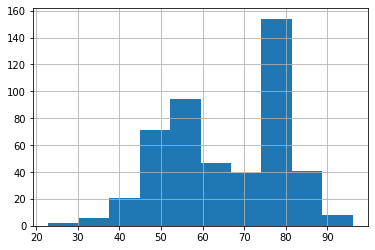

In [389]:
dfchurn['total_charge'].hist()

In [391]:
dfchurn['total_charge'].agg(['mean','median'])

mean      65.355963
median    66.910000
Name: total_charge, dtype: float64

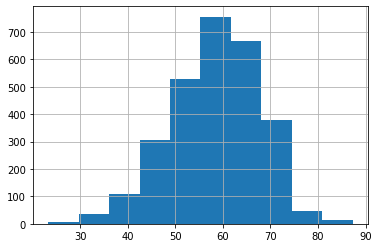

In [390]:
dfnochurn['total_charge'].hist()

In [392]:
dfnochurn['total_charge'].agg(['mean','median'])

mean      58.448807
median    58.920000
Name: total_charge, dtype: float64

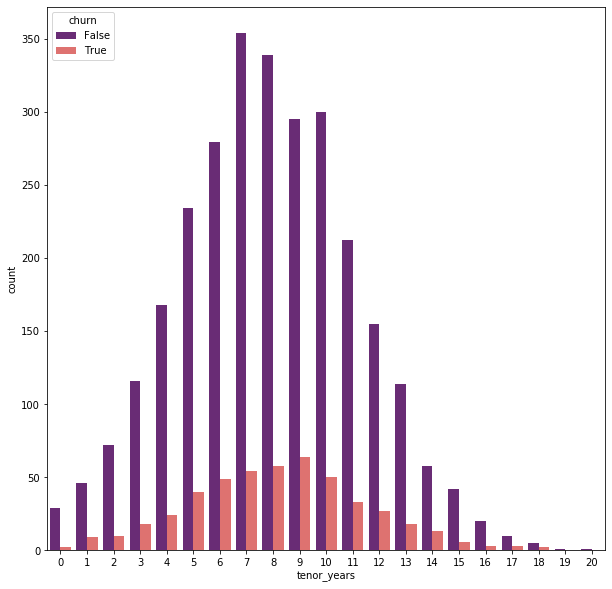

In [865]:
plt.figure(figsize=(10,10))
sns.countplot('tenor_years',hue='churn',data=df,palette='magma')
plt.title("")

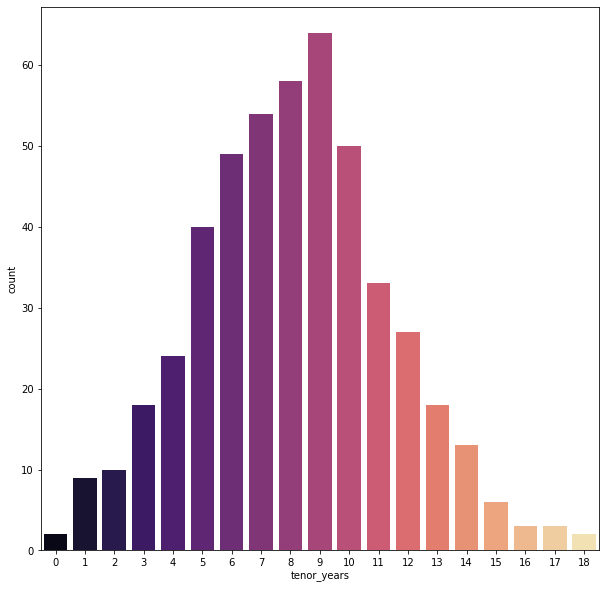

In [222]:
plt.figure(figsize=(10,10))
sns.countplot('tenor_years',data=dfchurn,palette='magma')

In [45]:
churnrate_byyear = df.groupby('tenor_years')['churn'].agg(['sum','count'])

In [46]:
churnrate_byyear['rate'] = churnrate_byyear['sum']/churnrate_byyear['count']*100

In [55]:
df15yearchurn = churnrate_byyear[0:16]

In [58]:
df15yearchurn.reset_index(inplace=True)

Text(0.5, 1.0, ' Churn Rate by Contract Length ')

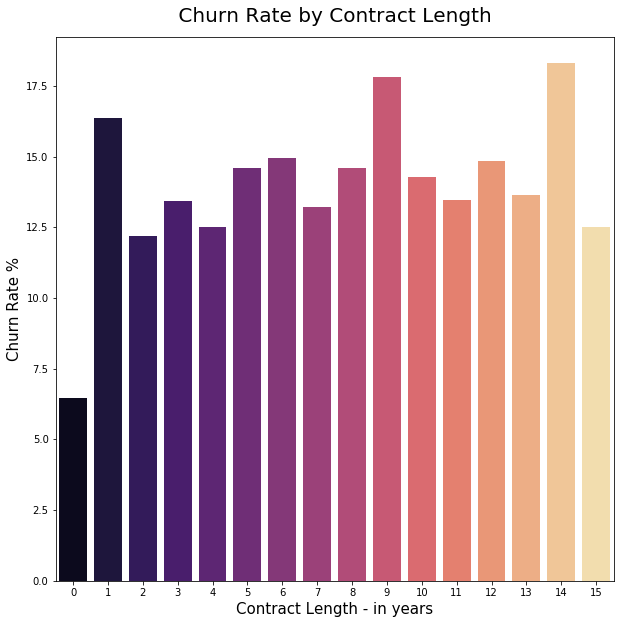

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(x='tenor_years',y='rate',data=df15yearchurn,palette = 'magma')
plt.ylabel('Churn Rate %',size=15)
plt.xlabel('Contract Length - in years',size=15)
plt.title(" Churn Rate by Contract Length ",size=20,pad=15)

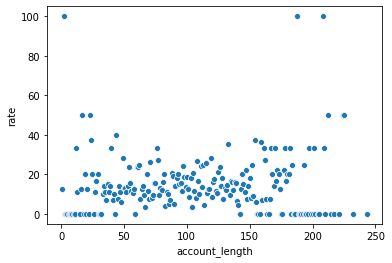

In [44]:
sns.scatterplot(x='account_length',y='rate',data=churnrate_byyear)

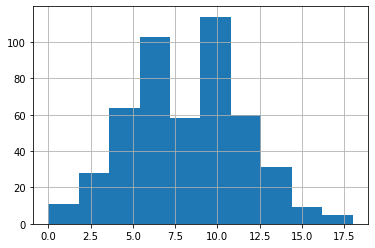

In [228]:
dfchurn['tenor_years'].hist()

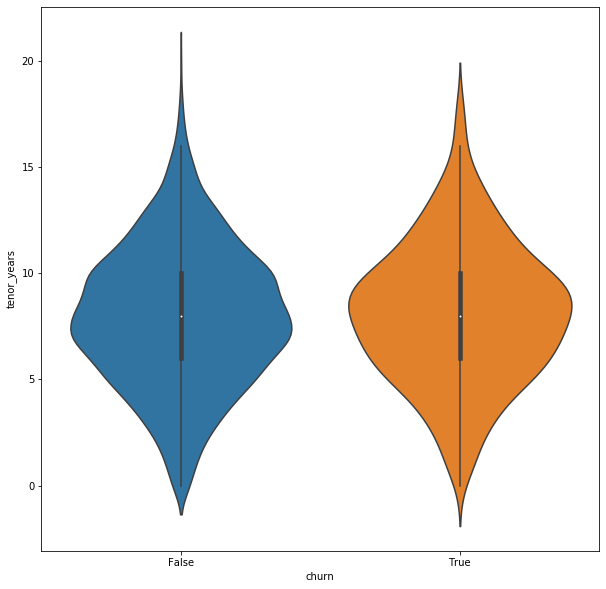

In [650]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df,x='churn',y='tenor_years')

# Customer Services Calls

In [11]:
dfchurn['customer_service_calls'].describe()

count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: customer_service_calls, dtype: float64

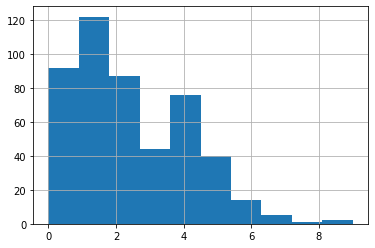

In [12]:
dfchurn['customer_service_calls'].hist()

In [13]:
dfnochurn['customer_service_calls'].describe()

count    2850.000000
mean        1.449825
std         1.163883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: customer_service_calls, dtype: float64

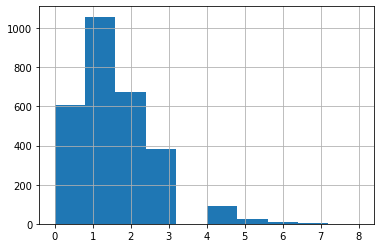

In [14]:
dfnochurn['customer_service_calls'].hist()

In [15]:
dfnochurn.loc[dfnochurn['customer_service_calls']>3].shape[0]/dfnochurn.shape[0]*100

4.526315789473685

In [16]:
dfchurn.loc[dfchurn['customer_service_calls']>3].shape[0]/dfchurn.shape[0]*100

28.57142857142857

**29% of people who leave make more than 3 customer service calls compared to only 4% for the people who stay**

In [17]:
df['customer_service_calls']

0       1
1       1
2       0
3       2
4       3
       ..
3328    2
3329    3
3330    2
3331    2
3332    0
Name: customer_service_calls, Length: 3333, dtype: int64

In [18]:
df_under2years = df.loc[df['tenor_years']<3]

In [19]:
df_under2years

state  account_length  area_code phone_number international_plan  \
28      MO              20        415     353-2630                 no   
33      AZ              12        408     360-1596                 no   
42      AR              34        510     353-7289                 no   
52      VA              10        408     349-4396                 no   
158     MO               6        510     350-9994                 no   
...    ...             ...        ...          ...                ...   
3215    WV              23        510     399-3089                 no   
3225    AR              33        408     371-9602                 no   
3228    OR              27        510     355-2840                 no   
3240    SD              34        408     392-5716                 no   
3330    RI              28        510     328-8230                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
28                no                      0              190.0   
33                no                      0              249.6   
42                no                      0              124.8   
52                no                      0              186.1   
158               no                      0              183.6   
...              ...                    ...                ...   
3215             yes                     31              156.6   
3225              no                      0              251.9   
3228              no                      0              232.1   
3240              no                      0              180.6   
3330              no                      0              180.8   

      total_day_calls  total_day_charge  ...  total_intl_calls  \
28                109             32.30  ...                 6   
33                118             42.43  ...                 3   
42                 82             21.22  ...                 4   
52                112             31.64  ...                 6   
158               117             31.21  ...                 2   
...               ...               ...  ...               ...   
3215               84             26.62  ...                 6   
3225               81             42.82  ...                 3   
3228               81             39.46  ...                 6   
3240               65             30.70  ...                 3   
3330              109             30.74  ...                 6   

      total_intl_charge  customer_service_calls  churn  total_charge  \
28                 1.70                       0  False         64.12   
33                 3.19                       1   True         79.68   
42                 2.70                       2  False         61.93   
52                 3.08                       2  False         63.62   
158                2.75                       1  False         63.82   
...                 ...                     ...    ...           ...   
3215               2.54                       1  False         56.15   
3225               2.27                       2  False         71.13   
3228               4.05                       5  False         68.87   
3240               1.35                       1  False         69.04   
3330               3.81                       2  False         67.74   

      tenor_years  total_minutes  avg_price_per_min  total_calls  dailycharge  
28              1          636.0           0.100818          301     3.206000  
33              1          794.0           0.100353          330     6.640000  
42              2          728.5           0.085010          262     1.821471  
52              0          670.5           0.094884          241     6.362000  
158             0          629.1           0.101447          270    10.636667  
...           ...            ...                ...          ...          ...  
3215            1          622.1           0.090259          293     2.441304  
3225            2          666.1     

In [20]:
df_calls_3 = df.loc[df['customer_service_calls']>3]

In [21]:
df_calls_3['churn'].value_counts()

True     138
False    129
Name: churn, dtype: int64

In [22]:
df_calls_3.loc[df_calls_3['churn']==True].shape[0]/df_calls_3.shape[0]

0.5168539325842697

**52% of customers who made more than 3 calls to customer service left. This would lead us to believe they had a poor experience with customer service**

In [25]:
df.loc[(df['customer_service_calls']==0) & (df['churn']==True)].shape[0]/df.shape[0]*100

2.7602760276027603

2% of people who left never rang customer service

In [28]:
df.loc[df['customer_service_calls']>7]

state  account_length  area_code phone_number international_plan  \
542     MN             152        415     416-2778                yes   
1502    SC              64        510     333-8822                 no   
1912    NH             103        408     371-1727                 no   
2380    NJ              53        408     416-6886                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
542              yes                     20              237.5   
1502             yes                     40              210.0   
1912              no                      0              150.6   
2380              no                      0              228.6   

      total_day_calls  total_day_charge  ...  total_intl_calls  \
542               120             40.38  ...                 3   
1502              116             35.70  ...                 4   
1912              125             25.60  ...                 8   
2380              117             38.86  ...                 2   

      total_intl_charge  customer_service_calls  churn  total_charge  \
542                3.83                       9   True         77.68   
1502               1.59                       8  False         64.67   
1912               2.81                       8   True         52.73   
2380               2.73                       9   True         63.10   

      tenor_years  total_minutes  avg_price_per_min  total_calls  dailycharge  
542            12          770.3           0.100844          297     0.511053  
1502            5          617.4           0.104746          303     1.010469  
1912            8          551.3           0.095647          363     0.511942  
2380            4          598.7           0.105395          366     1.190566  

[4 rows x 27 columns]

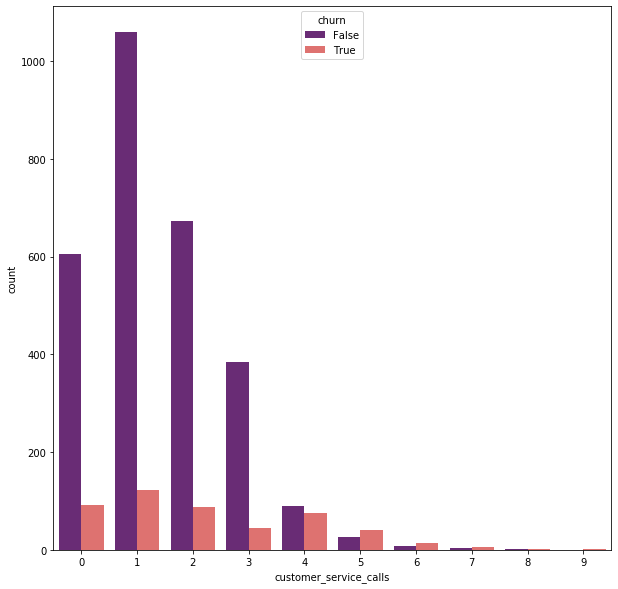

In [29]:
plt.figure(figsize=(10,10))
sns.countplot('customer_service_calls',hue='churn',data=df,palette='magma')

In [30]:
df['calls>3'] = np.where(df['customer_service_calls']>3,1,0)

Text(0, 0.5, ' Number of Customers')

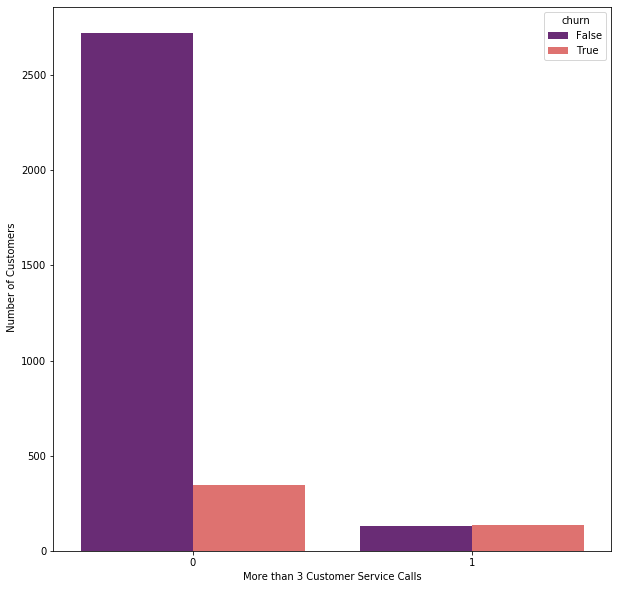

In [31]:
plt.figure(figsize=(10,10))
sns.countplot('calls>3',hue='churn',data=df,palette='magma')
plt.xlabel('More than 3 Customer Service Calls')
plt.ylabel(" Number of Customers")

In [32]:
df['calls>2'] = np.where(df['customer_service_calls']>2,1,0)

Text(0, 0.5, ' Number of Customers')

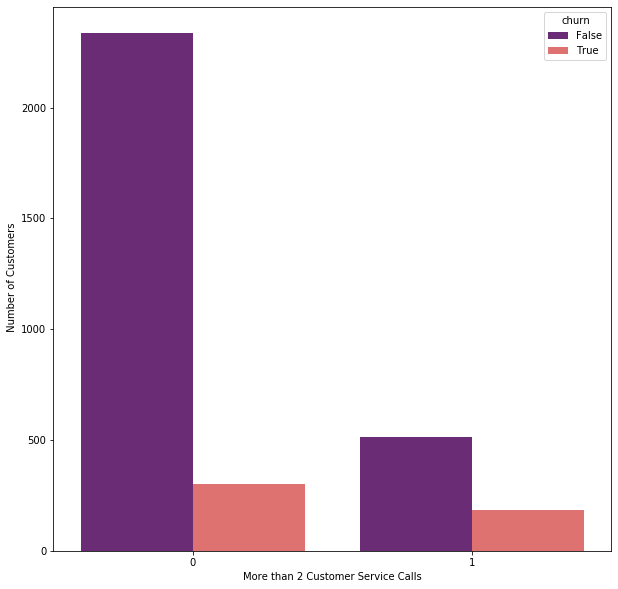

In [33]:
plt.figure(figsize=(10,10))
sns.countplot('calls>2',hue='churn',data=df,palette='magma')
plt.xlabel('More than 2 Customer Service Calls')
plt.ylabel(" Number of Customers")

# Exploring Minutes Differences

In [92]:
df['total_day_minutes'].mean(),dfnochurn['total_day_minutes'].mean(),dfchurn['total_day_minutes'].mean()


(179.77509750975094, 175.1757543859649, 206.91407867494823)

In [121]:
df['total_day_minutes>210'] = np.where(df['total_day_minutes']>210,1,0)

In [117]:
df['total_eve_minutes'].mean(),dfnochurn['total_eve_minutes'].mean(),dfchurn['total_eve_minutes'].mean()


(200.98034803480348, 199.043298245614, 212.41014492753624)

In [120]:
df['total_eve_minutes>215'] = np.where(df['total_eve_minutes']>215,1,0)

In [122]:
df['total_night_minutes'].mean(),dfnochurn['total_night_minutes'].mean(),dfchurn['total_night_minutes'].mean()


(200.87203720372037, 200.13319298245614, 205.23167701863352)

In [123]:
df['total_night_minutes>210'] = np.where(df['total_night_minutes']>210,1,0)

In [124]:
df['total_intl_minutes'].mean(),dfnochurn['total_intl_minutes'].mean(),dfchurn['total_intl_minutes'].mean()


(10.237293729372938, 10.158877192982455, 10.700000000000001)

In [125]:
df['total_minutes'].mean(),dfnochurn['total_minutes'].mean(),dfchurn['total_minutes'].mean()


(591.8647764776478, 584.5111228070175, 635.2559006211179)

In [126]:
df['total_minutes>650'] = np.where(df['total_minutes']>650,1,0)

In [127]:
df['total_calls'].mean(),dfnochurn['total_calls'].mean(),dfchurn['total_calls'].mean()


(305.1371137113711, 304.91298245614036, 306.45962732919253)

In [114]:
df['total_minutes'].mean()+df['total_minutes'].std()

681.8190276298178

# Exploring Total Charge differences

In [261]:
dfnochurn['total_charge'].mean()

58.448807017543864

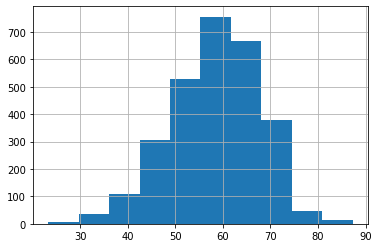

In [262]:
dfnochurn['total_charge'].hist()

In [263]:
dfchurn['total_charge'].mean()

65.35596273291925

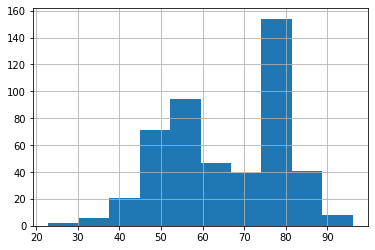

In [264]:
dfchurn['total_charge'].hist()

In [274]:
dfnochurn.loc[dfnochurn['total_charge'] >70].count()/dfnochurn.count()

state                     0.105614
account_length            0.105614
area_code                 0.105614
phone_number              0.105614
international_plan        0.105614
voice_mail_plan           0.105614
number_vmail_messages     0.105614
total_day_minutes         0.105614
total_day_calls           0.105614
total_day_charge          0.105614
total_eve_minutes         0.105614
total_eve_calls           0.105614
total_eve_charge          0.105614
total_night_minutes       0.105614
total_night_calls         0.105614
total_night_charge        0.105614
total_intl_minutes        0.105614
total_intl_calls          0.105614
total_intl_charge         0.105614
customer_service_calls    0.105614
churn                     0.105614
acc_length_years          0.105614
total_charge              0.105614
dtype: float64

In [273]:
dfchurn.loc[dfchurn['total_charge'] >70].count()/dfchurn.count()

state                     0.465839
account_length            0.465839
area_code                 0.465839
phone_number              0.465839
international_plan        0.465839
voice_mail_plan           0.465839
number_vmail_messages     0.465839
total_day_minutes         0.465839
total_day_calls           0.465839
total_day_charge          0.465839
total_eve_minutes         0.465839
total_eve_calls           0.465839
total_eve_charge          0.465839
total_night_minutes       0.465839
total_night_calls         0.465839
total_night_charge        0.465839
total_intl_minutes        0.465839
total_intl_calls          0.465839
total_intl_charge         0.465839
customer_service_calls    0.465839
churn                     0.465839
acc_length_years          0.465839
total_charge              0.465839
dtype: float64

In [99]:
df['total_charge>70'] = np.where(df['total_charge']>70,1,0)

In [141]:
df['int+voice'] = np.where((df['international_plan']=='yes')&(df['voice_mail_plan']=='yes'),1,0)

In [144]:
df['int+novoice'] = np.where((df['international_plan']=='yes')&(df['voice_mail_plan']=='no'),1,0)

In [145]:
df['noint+novoice'] = np.where((df['international_plan']=='no')&(df['voice_mail_plan']=='yes'),1,0)

In [147]:
df['noint+novoice'] = np.where((df['international_plan']=='no')&(df['voice_mail_plan']=='no'),1,0)

In [149]:
df['noint+novoice'].value_counts()

1    2180
0    1153
Name: noint+novoice, dtype: int64

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x121b84730> (for post_execute):


KeyboardInterrupt: 

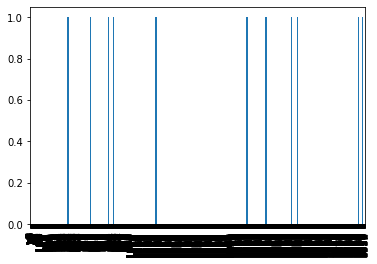

In [153]:
df['int+novoice'].plot(kind='bar')

In [ ]:
sns.lineplot()

In [150]:
df.to_csv('newdata.csv')

In [201]:
df_areacode = df.groupby

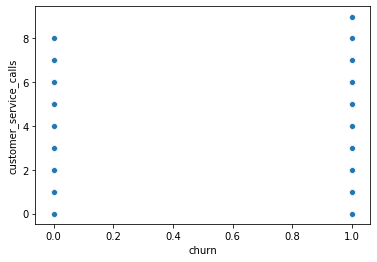

In [275]:
sns.scatterplot(y = 'customer_service_calls',x = 'churn',data=df)

# Exploring the difference between churn and no churn data

In [129]:
df.groupby('churn').mean()

account_length   area_code  number_vmail_messages  total_day_minutes  \
churn                                                                         
False      100.793684  437.074737               8.604561         175.175754   
True       102.664596  437.817805               5.115942         206.914079   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
False       100.283158         29.780421         199.043298       100.038596   
True        101.335404         35.175921         212.410145       100.561077   

       total_eve_charge  total_night_minutes  ...   calls>3  annual_charge  \
churn                                         ...                            
False         16.918909           200.133193  ...  0.045263     701.385684   
True          18.054969           205.231677  ...  0.285714     784.271553   

       total_day_minutes>200  total_eve_minutes>210  total_night_minutes>210  \
churn                                                                          
False               0.289123               0.415789                 0.429474   
True                0.530021               0.513458                 0.457557   

       total_charge>70  total_minutes>635  total_eve_minutes>215  \
churn                                                              
False         0.105614           0.217895               0.373333   
True          0.465839           0.492754               0.472050   

       total_day_minutes>210  total_minutes>650  
churn                                            
False               0.251228           0.217895  
True                0.523810           0.492754  

[2 rows x 31 columns]

In [699]:
df.groupby('churn').median()

account_length  area_code  number_vmail_messages  total_day_minutes  \
churn                                                                        
False             100        415                      0              177.2   
True              103        415                      0              217.6   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
False              100             30.12              199.6              100   
True               103             36.99              211.3              101   

       total_eve_charge  total_night_minutes  ...  total_night_charge  \
churn                                         ...                       
False             16.97               200.25  ...                9.01   
True              17.96               204.80  ...                9.22   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
churn                                                            
False                10.2                 4               2.75   
True                 10.6                 4               2.86   

       customer_service_calls  total_charge  tenor_years  total_minutes  \
churn                                                                     
False                       1         58.92            8          589.2   
True                        2         66.91            8          646.1   

       avg_price_per_min  avg_ppm_day  
churn                                  
False           0.099955     0.170004  
True            0.102976     0.170004  

[2 rows x 21 columns]

In [288]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [874]:
df.corr()

account_length  area_code  number_vmail_messages  \
account_length                1.000000  -0.012463              -0.004628   
area_code                    -0.012463   1.000000              -0.001994   
number_vmail_messages        -0.004628  -0.001994               1.000000   
total_day_minutes             0.006216  -0.008264               0.000778   
total_day_calls               0.038470  -0.009646              -0.009548   
total_day_charge              0.006214  -0.008264               0.000776   
total_eve_minutes            -0.006757   0.003580               0.017562   
total_eve_calls               0.019260  -0.011886              -0.005864   
total_eve_charge             -0.006745   0.003607               0.017578   
total_night_minutes          -0.008955  -0.005825               0.007681   
total_night_calls            -0.013176   0.016522               0.007123   
total_night_charge           -0.008960  -0.005845               0.007663   
total_intl_minutes            0.009514  -0.018288               0.002856   
total_intl_calls              0.020661  -0.024179               0.013957   
total_intl_charge             0.009546  -0.018395               0.002884   
customer_service_calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   
total_charge                  0.001454  -0.008393               0.009766   
tenor_years                   0.996327  -0.014463              -0.004717   
total_minutes                -0.004785  -0.006828               0.014779   
avg_price_per_min             0.012088  -0.004405              -0.003150   
avg_ppm_day                  -0.000073  -0.009105              -0.031363   

                        total_day_minutes  total_day_calls  total_day_charge  \
account_length                   0.006216         0.038470          0.006214   
area_code                       -0.008264        -0.009646         -0.008264   
number_vmail_messages            0.000778        -0.009548          0.000776   
total_day_minutes                1.000000         0.006750          1.000000   
total_day_calls                  0.006750         1.000000          0.006753   
total_day_charge                 1.000000         0.006753          1.000000   
total_eve_minutes                0.007043        -0.021451          0.007050   
total_eve_calls                  0.015769         0.006462          0.015769   
total_eve_charge                 0.007029        -0.021449          0.007036   
total_night_minutes              0.004323         0.022938          0.004324   
total_night_calls                0.022972        -0.019557          0.022972   
total_night_charge               0.004300         0.022927          0.004301   
total_intl_minutes              -0.010155         0.021565         -0.010157   
total_intl_calls                 0.008033         0.004574          0.008032   
total_intl_charge               -0.010092         0.021666         -0.010094   
customer_service_calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   
total_charge                     0.884754         0.003673          0.884757   
tenor_years                      0.007989         0.037435          0.007987   
total_minutes                    0.611587         0.005559          0.611591   
avg_price_per_min                0.779747         0.001838          0.779747   
avg_ppm_day                     -0.027128        -0.006811         -0.026918   

                        total_eve_minutes  total_eve_calls  total_eve_charge  \
account_length                  -0.006757         0.019260         -0.006745   
area_code                        0.003580        -0.011886          0.003607   
number_vmail_messages            0.017562        -0.005864          0.017578   
total_day_minutes                0.007043         0.015769          0.007029   
total_day_calls                 -0

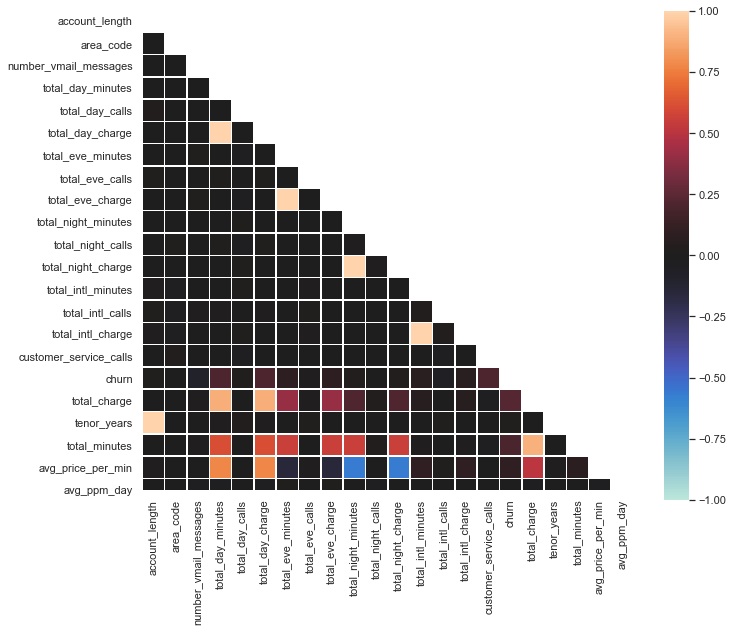

In [909]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, center=0,square=True,
            linewidths=.5)

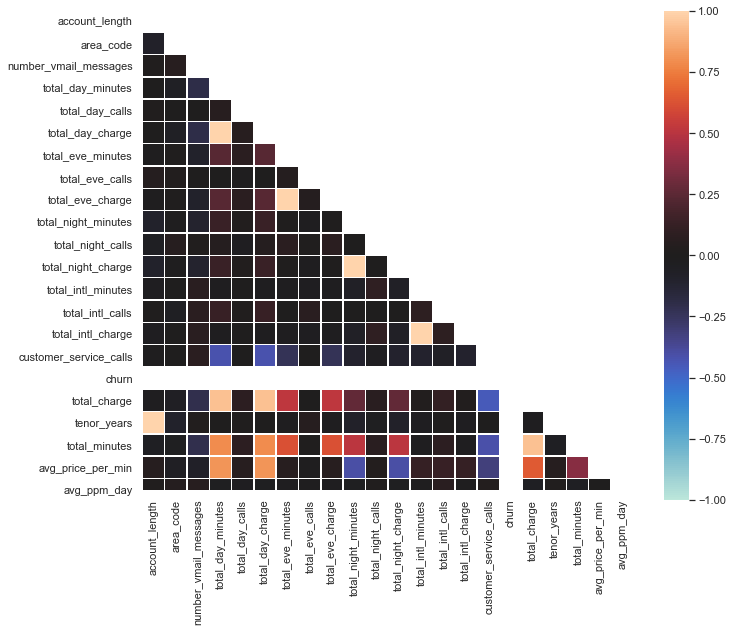

In [911]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = dfchurn.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, center=0,square=True,
            linewidths=.5)

In [137]:
dfchurn.loc[dfchurn['international_plan']=='yes','total_intl_calls'].mean()

3.9416058394160585

In [136]:
dfnochurn.loc[dfnochurn['international_plan']=='yes','total_intl_calls'].mean()

5.102150537634409